# Introduction to neural network classification with Tensorflow

A classification is where you try to classify something as one thing or another.

A few types of classification:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], 
                        "X1": X[:, 1],
                        "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


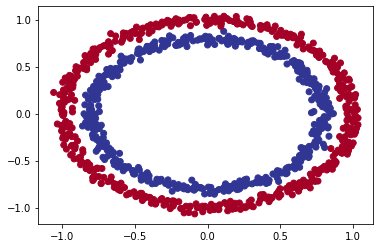

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Exercise - Build your own model

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set the random_seed
tf.random.set_seed(42)

# Create the model
model = keras.models.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6388
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7700
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.8075
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.9787
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.9737
Epoch 11/

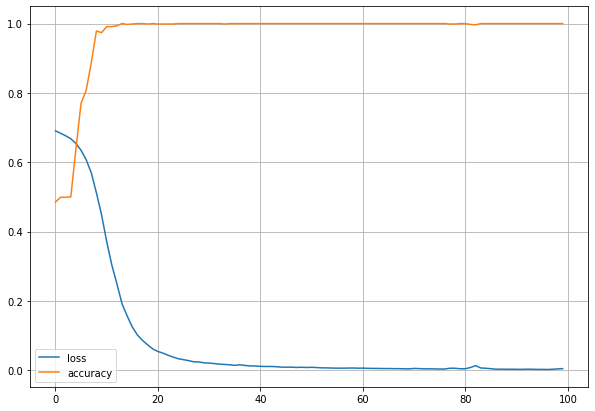

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [ ]:
# Evaluating the model on the test data
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0027465345337986946, 1.0]

In [ ]:
# Predicting the model on test data
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the diffrent X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones(where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

313/313 [==============================] - 0s 1ms/step
doing binary classification


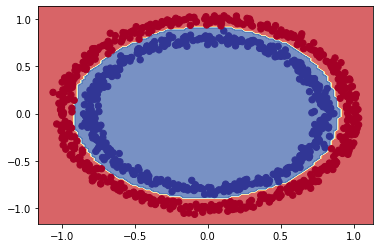

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model, X, y)

### Activation functions

We've discussed the concept of linear and no-linear functions, let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

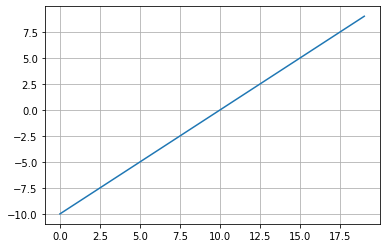

In [ ]:
# Visualize our toy tensor
plt.plot(A)
plt.grid();

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
sigmoid = lambda x: 1 / (1 + tf.exp(-x))

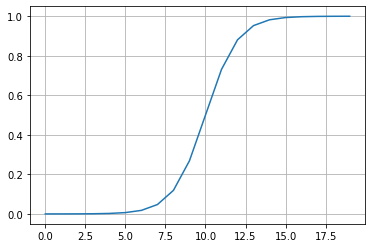

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))
plt.grid();

In [ ]:
# Let's replicate relu - relu(x) = max(0, x)
relu = lambda x: tf.math.maximum(0, x)

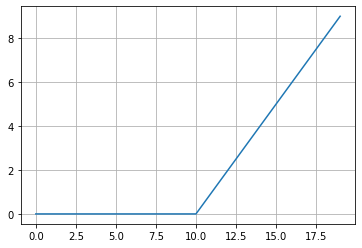

In [ ]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))
plt.grid();

In [ ]:
# Let's replicate tanh - tanh(x) = (e(x) - e(-x)) / (e(x) + e(-x))
tanh = lambda x: (tf.exp(x) - tf.exp(-x)) / (tf.exp(x) + tf.exp(-x))

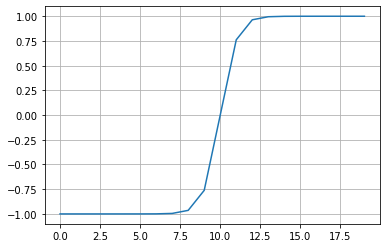

In [ ]:
# Plot our toy tensor transformed by tanh
plt.plot(tanh(A))
plt.grid();

In [ ]:
# Let's replicate LeakyReLU - LeakyReLU = max(ax, x)
leaky_relu = lambda x: tf.maximum(0.1*x, x)

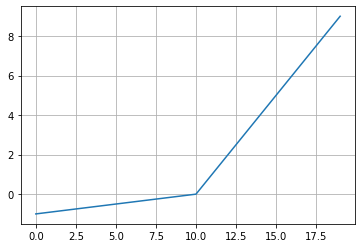

In [ ]:
# Plot our toy tensor transformed by teaky_relu
plt.plot(leaky_relu(A))
plt.grid();

###Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* it is training.
* Another model.
* A modified loss curves plot.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = keras.models.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.4850
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6388
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7700
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.8075
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.9787
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.9737
Epoch 11/

### More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [ ]:
# Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {(loss):.5f}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Model loss on the test set: 0.00275
Model accuracy on the test set: 100.00%


In [ ]:
y_pred = tf.round(model.predict(X_test))

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[101,   0],
       [  0,  99]])

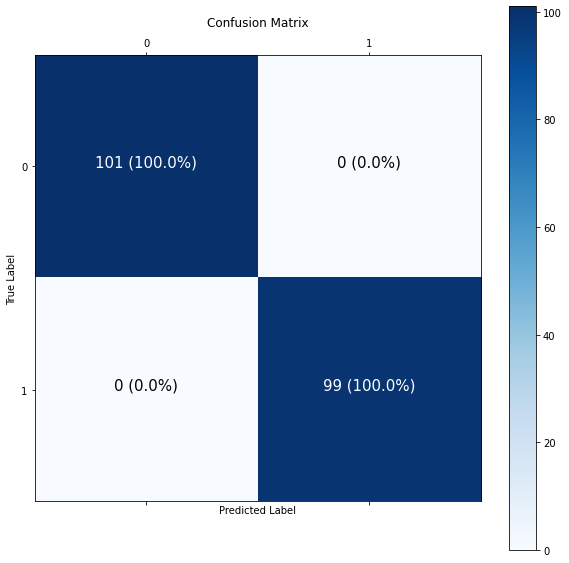

In [ ]:
# How about we prettify our confusion matrix?
import itertools

figsize = (10, 10)

# Create the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's pretiffy it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# Precision & Recall & F-1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print("The precision score:", precision_score(y_test, y_pred))
print("The recall score:", recall_score(y_test, y_pred))
print("The F1 score:", f1_score(y_test, y_pred))

The precision score: 1.0
The recall score: 1.0
The F1 score: 1.0


# Multiclass Classification

When you have more than two classes as an option, it's known as **multi-class** classification.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 diffrent classes, it's multi-class classification.

In [ ]:
# Preparing the data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

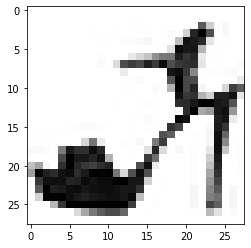

In [ ]:
# Plot a single sample
plt.imshow(train_data[9], cmap=plt.cm.binary);

In [ ]:
# Create a small list so we can index onto our training label so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

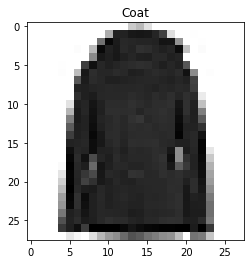

In [ ]:
# Plot an example image and its label
index = 2000
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

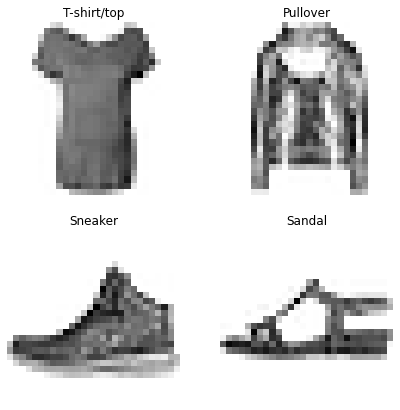

In [ ]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model

* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)

**Note**:
* If your labels are one-hot encoded, use `CategoricalCrossEntropy()`.
* If your labels are integer form, use `SparseCategoricalCrossEntropy()`.
* Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Normalizing the training data
train_data, test_data = train_data / 255.0, test_data / 255.0

# Create the model
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data, 
                    train_labels, 
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 18s 11ms/step - loss: 0.4948 - accuracy: 0.8236 - val_loss: 0.3855 - val_accuracy: 0.8618
Epoch 2/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3682 - accuracy: 0.8664 - val_loss: 0.3851 - val_accuracy: 0.8592
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3328 - accuracy: 0.8775 - val_loss: 0.3409 - val_accuracy: 0.8788
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3040 - accuracy: 0.8864 - val_loss: 0.3321 - val_accuracy: 0.8780
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2905 - accuracy: 0.8909 - val_loss: 0.3368 - val_accuracy: 0.8804
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2713 - accuracy: 0.8990 - val_loss: 0.3326 - val_accuracy: 0.8783
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2565 - accuracy: 0.9024 - val_loss: 0.3474 - val_acc

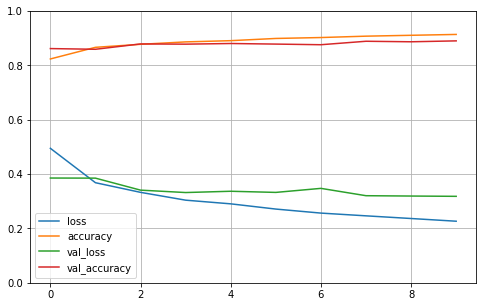

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8828


[0.35137978196144104, 0.8827999830245972]

### Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_lr = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_lr.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history = model_lr.fit(train_data,
             train_labels,
             epochs=10,
             callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4773 - accuracy: 0.8276 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3635 - accuracy: 0.8655 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3357 - accuracy: 0.8763 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3146 - accuracy: 0.8842 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3047 - accuracy: 0.8861 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2923 - accuracy: 0.8911 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2906 - accuracy: 0.8929 - lr: 0.0020
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2851 - accuracy: 0.8956 - lr: 0.0022
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

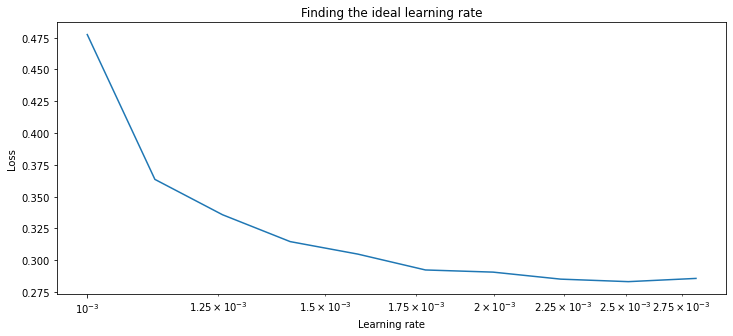

In [ ]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(10)/20))
plt.figure(figsize=(12, 5))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# How about we prettify our confusion matrix?
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15)):

  # Create the confusion_matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's pretiffy it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=10)

In [ ]:
# Make some predictions with our model
y_probs = model.predict(test_data)
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.8944786e-07, 1.8693091e-06, 3.3147569e-09, 1.8426120e-07,
        1.0735854e-09, 1.3268023e-04, 9.7231066e-08, 1.5967207e-02,
        3.1293354e-07, 9.8389739e-01],
       [7.4078043e-06, 1.3129543e-12, 9.9586052e-01, 2.2214978e-08,
        3.8284317e-03, 2.3680520e-13, 3.0351337e-04, 1.2375454e-14,
        4.3224198e-09, 9.7980706e-14],
       [5.8294054e-14, 9.9999994e-01, 5.1147112e-17, 3.6321193e-14,
        6.0992068e-15, 2.4130047e-26, 6.5837018e-16, 1.8958686e-26,
        2.9736828e-16, 5.2655115e-23],
       [1.4851971e-12, 9.9999994e-01, 5.4496571e-15, 2.7635927e-10,
        1.2076287e-13, 2.2947073e-21, 3.4711196e-13, 8.7481432e-24,
        9.7122532e-14, 5.4152639e-20],
       [5.3467248e-02, 8.0593017e-09, 1.6917376e-03, 8.0683385e-05,
        1.4326419e-03, 8.2121415e-10, 9.4332492e-01, 1.6069526e-08,
        2.5861141e-06, 3.7677608e-10]], dtype=float32)

In [ ]:
y_pred = y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

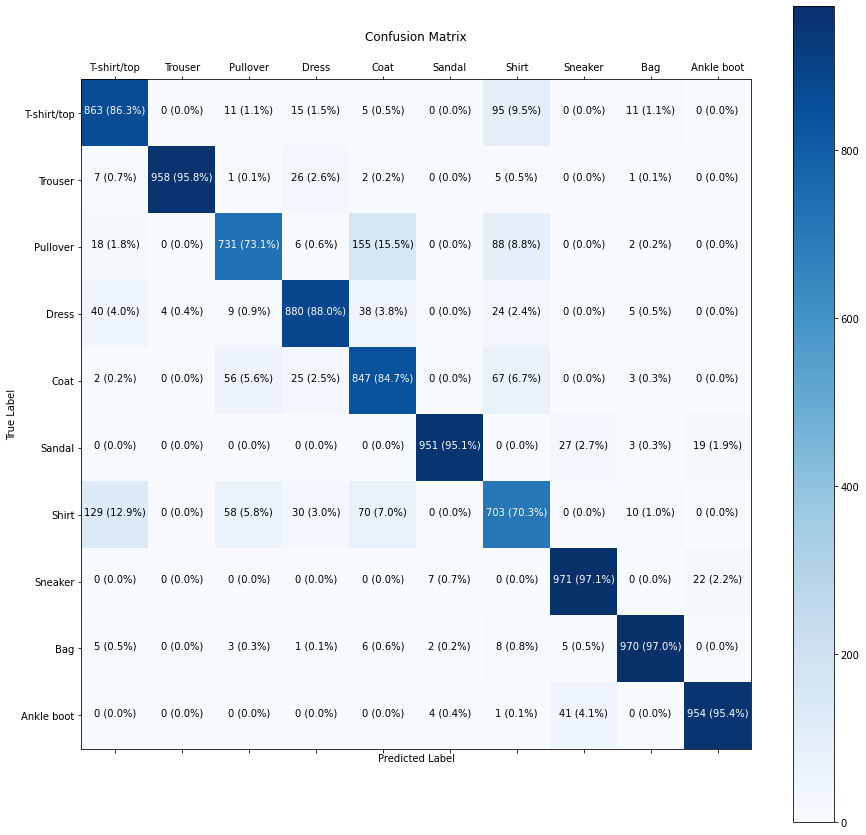

In [ ]:
make_confusion_matrix(test_labels, y_pred, classes=class_names)

In [ ]:
confusion_matrix(test_labels, y_pred)

array([[863,   0,  11,  15,   5,   0,  95,   0,  11,   0],
       [  7, 958,   1,  26,   2,   0,   5,   0,   1,   0],
       [ 18,   0, 731,   6, 155,   0,  88,   0,   2,   0],
       [ 40,   4,   9, 880,  38,   0,  24,   0,   5,   0],
       [  2,   0,  56,  25, 847,   0,  67,   0,   3,   0],
       [  0,   0,   0,   0,   0, 951,   0,  27,   3,  19],
       [129,   0,  58,  30,  70,   0, 703,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 971,   0,  22],
       [  5,   0,   3,   1,   6,   2,   8,   5, 970,   0],
       [  0,   0,   0,   0,   0,   4,   1,  41,   0, 954]])

> Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_label, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information 
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
                                                   color=color)
  


1/1 [==============================] - 0s 26ms/step


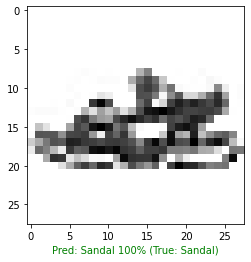

In [ ]:
plot_random_image(model, 
                  test_data, 
                  test_labels,
                  class_names)